# Exploring Stack Overflow Data- 2019 Survey

### Introduction
Founded in 2008, Stack Overflow is the largest, most trusted online community for anyone that codes to learn, share their knowledge, and build their careers. More than 50 million unique visitors come to Stack Overflow each month to help solve coding problems, develop new skills, and find job opportunities (https://stackoverflow.com/company).

The Stack Overflow survey is done annually and is the largest developer survey which helps understand people in the tech industry from all around the world and gives an idea of how these individuals experience the field.

This project answers few questions out of many possible questions that can be answered from the vast data generated through this survey.

### Business Understanding

Stack Overflow generally has helped me and so many individuals around the world share knowledge, solve problems and start new careers. For this data, I wanted to answer the following questions:
- What degree qualification do people who regularly use Stack Overflow have?
- What education level is favorable to be employed full-time?
- Of the people who use this platform, what proportion is employed?
- How many people are satisfied with their jobs?
- What correlates with career satisfaction in the tech industry?

These are things which can help the organization know which initiatives directed to help people find satisfying careers.

### Data Understanding/Preparing

For this section, the data is gathered and accessed to get a better understanding of the parameter which are used to answer the above questions.

##### Data gathering:
This data was downloaded from https://insights.stackoverflow.com/survey. The data is Stack Overflow Annual Developer Survey - 2019 survey.

We can further understand this by exploring and familiarizing with it to get a better understanding.

In [1]:
#imported necessary libraries required for project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import scipy.stats as ss
%matplotlib inline

df = pd.read_csv('survey_results_public.csv') #reads csv file into dataframe
schema = pd.read_csv('survey_results_schema.csv') #reads csv file into dataframe

df.head() #returns first 5 rows of dataframe

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [205]:
# Takes inputs of column name from the schema dataframe
# output description/questions for the data column

def description(column_name, schema=schema):
    for columns in schema:  # Iterates through the Schema dataframe
        if True:
            desc = list(schema[schema.Column == column_name]['QuestionText'])[0] # Prints opposite column related to specified column name
        else:
            break
    return desc

description('JobSat') # Function to get the description or question related to column name

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

##### Data exploration:

In this section, the focus was to understand the data which involved checking how many rows and columns are available, what data types are used, a quick summary of the data, checking for null values and creating visualizations to get an indepth understanding of the variables.




In [4]:
df.shape # Prints the dimensions of data

(88883, 85)

In [6]:
df.info() # Print a summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [5]:
df.describe() # Generates descriptive statistics

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [7]:
no_null = set(df.columns[df.notnull().all()]) # Finds all columns without null values

null_values = set(df.columns[df.isnull().sum()/len(df) > .20]) # Finds all columns with null values greater than 20%


print(no_null) # Prints columns with no null values
print(null_values) # Prints columns with null values

{'Respondent', 'Hobbyist', 'OpenSourcer'}
{'WorkWeekHrs', 'SOHowMuchTime', 'PurchaseWhat', 'CodeRevHrs', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'WebFrameWorkedWith', 'PurchaseHow', 'SONewContent', 'JobSat', 'MgrMoney', 'MgrIdiot', 'CompFreq', 'DatabaseDesireNextYear', 'CompTotal', 'ConvertedComp', 'WorkChallenge', 'WorkLoc', 'CodeRev', 'WorkPlan', 'MgrWant', 'UnitTests', 'WebFrameDesireNextYear', 'BlockchainOrg', 'BlockchainIs', 'LastInt', 'WorkRemote'}


In [208]:
# Function plots a bar chart
# Input - column_name and Title of bar chart
# Output - bar chat showing proportion of variables

def plot(column_name, title):
    branch_vars = df[column_name].value_counts()  # Stores values of column in a variable
    show = (branch_vars/df.shape[0]).plot(kind = 'bar'); # Calculates proportions for each value
    plt.title(title); # Title of bar chart
    return show

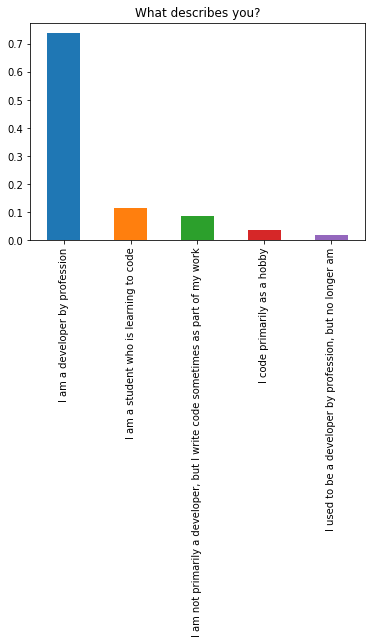

In [209]:
plot('MainBranch', 'What describes you?'); # Plots bar chart

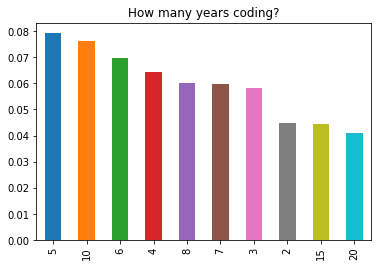

In [210]:
branch_vars = df['YearsCode'].value_counts()  # Stores values of column in a variable
(branch_vars[:10]/df.shape[0]).plot(kind = 'bar');  # Calculates proportions for first ten value
plt.title("How many years coding?"); # Title of bar chart

##### Data Cleaning:

For this project, it is clear that there are some missing values especially for int and float data types. Also there are outliers in these same categories of data types.

- First, a copy of the initial data is created so I can go back if there has been a mistake in what I have done. This is also standard practice.
- For int and float data types, filled alled NaN values with median because they reflect what vast majority of the data represented. The outliers tilt the values if the mean is used.
- For object data types or categorical values I didn't remove the values as the value_counts() returns unique categorical data provided excluding the NaN values.

Most of the analysis done was done with categorical variables as about 90% of data provided is categorical.

In [190]:
df_copy = df.copy() # Makes copy of original dataframe

In [224]:
num_vars = df.select_dtypes(include=['float', 'int']).columns # Columns with 'float' and 'int' data type
for col in num_vars:
    df[col].fillna((df[col].median()), inplace=True) # Iterates over columns in num_vars and fills NA values with its median value

In [225]:
df['WorkWeekHrs'].isnull().sum() # Number of null values

0

Apart from these mentioned, the data is clean in the context of quality and validity.

## Analysis

In this project I am simply trying to know:

- **What degree qualification do people who regularly use Stack Overflow have?**
With the assumption that people who completed this survey know the company and regularly use this platform, I found out that people with Bachelors degrees have a higher proportion at about 45% of people using stack overflow and they might also have a masters degree as well, which counts for masters degree coming in second at about 22%. It is less likely to have people who never completed a formal degree using the platform.

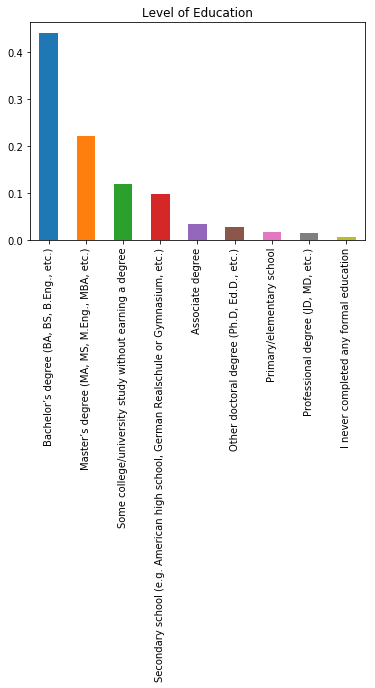

In [206]:
plot('EdLevel', 'Level of Education'); # Plots a bar chart

- **Of the people who use this platform, what proportion is employed?**
More than 70% of the repondents who indicated their employment status as "Employed full-time" frequently use Stack Overflow followed by freelancers at 9% and people looking for job work following freelancers. It's quite surprising to see people employed part-time coming in 4th place as one will think they use the platform since they are employed. This might also be due to little representation from that group in the survey.

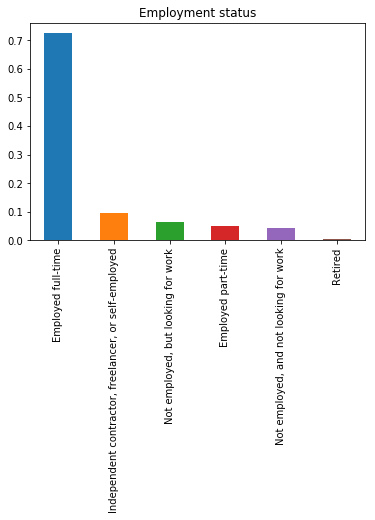

In [20]:
plot('Employment', 'Employment status'); # Plots bar chart

- **What education level is favorable to be employed full-time?**
I was curious and wanted to investigate what level of education is required for one to be employed and the analysis shows that for people employed full-time, 50% of them has a Bachelor's degree followed by a Master's degree at 26%. Surprisingly 10% of people who went to college/university without earning a degree were employed full-time. So your best bet might be going to a university and having a t least a Bachelor's degree.

On the flip side, people with secondary school degrees were unemployed and not looking for jobs. For those not employed and looking for jobs, people with Bachelor's degree had a higher percentage at 36%. This might correlate to the fact that after one is done with university they start looking for employment and may flock to sites like Stack Overflow while trying to upgrade their skills and look for jobs.

In [230]:
employed = df.groupby(['Employment'])['EdLevel'].value_counts().unstack() # Grouping employement by education level

full_time = pd.DataFrame(employed.iloc[0]/employed.sum(axis = 1)[0]) # Proportion of people employed full_time stored in dataframe
part_time = pd.DataFrame(employed.iloc[1]/employed.sum(axis = 1)[1]) # Proportion of people employed part_time stored in dataframe
freelancer = pd.DataFrame(employed.iloc[2]/employed.sum(axis = 1)[2]) # Proportion of people Independent contractor, freelancer, or self-employed stored in dataframe
looking_for_work = pd.DataFrame(employed.iloc[3]/employed.sum(axis = 1)[3]) # Proportion of people Not employed, and looking for work stored in dataframe
not_looking_for_work = pd.DataFrame(employed.iloc[4]/employed.sum(axis = 1)[4]) # Proportion of people Not employed, and not looking for work stored in dataframe
retired = pd.DataFrame(employed.iloc[5]/employed.sum(axis = 1)[5]) # Proportion of people Retired stored in dataframe

data_frames = [full_time,part_time,freelancer,looking_for_work,not_looking_for_work,retired] # Saves all dataframes in the data_frames variable

df_merged = (lambda  left,right: pd.merge(left,right,on=['Employment'],
                                            how='outer'), data_frames) # Merges all dataframes into one df_merged

df_merged[1] # Prints df_merged dataframe with each proportion

[                                                    Employed full-time
 EdLevel                                                               
 Associate degree                                              0.033308
 Bachelor’s degree (BA, BS, B.Eng., etc.)                      0.500862
 I never completed any formal education                        0.004587
 Master’s degree (MA, MS, M.Eng., MBA, etc.)                   0.257160
 Other doctoral degree (Ph.D, Ed.D., etc.)                     0.031837
 Primary/elementary school                                     0.004871
 Professional degree (JD, MD, etc.)                            0.014266
 Secondary school (e.g. American high school, Ge...            0.046672
 Some college/university study without earning a...            0.106439,
                                                     Employed part-time
 EdLevel                                                               
 Associate degree                                              

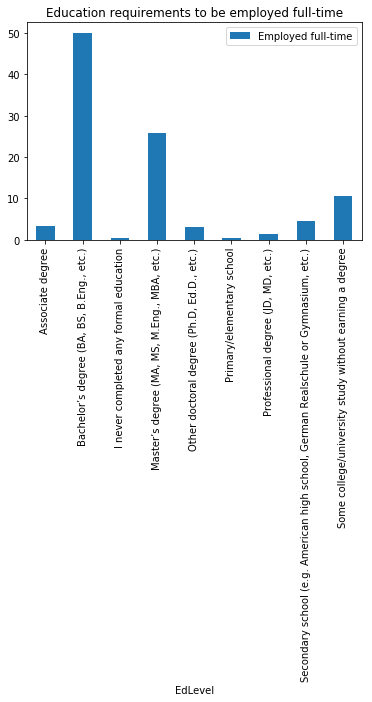

In [211]:
(full_time*100).plot(kind = 'bar');
plt.title('Education requirements to be employed full-time'); # Plots the percentage of the full_time dataframe

- **How many people are satisfied with their jobs:**
Narrowing down to those who are employed, I wanted to know the number of people and the proportion of people satisfied with their jobs.
It turned out that more people were slightly satisfied in their full-time and part-time jobs. When it came to freelance jobs, more people were very satisfied. This might be due to the type of job they might be doing and further data exploration from different sources to know why.

I visually represented the proportion of people who were slightly satisfied in their employement type as well as presenting just the data for those who indicated that there are employed full-time.

In [231]:
jobsat = df.groupby(['Employment'])['JobSat'].value_counts().unstack() # Grouping Employment by Job Satisfaction

jobsat # Displays grouped data

JobSat,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied,Very dissatisfied,Very satisfied
Employment,,,,,
Employed full-time,7208,9389,21041,4171,19257
Employed part-time,383,413,1003,168,779
"Independent contractor, freelancer, or self-employed",1031,903,2088,486,2336


In [232]:
print(jobsat['Slightly satisfied']) # Prints values for 'Slightly satisfied'
print(jobsat['Very satisfied']) # Prints values for 'Slightly satisfied'

Employment
Employed full-time                                      21041
Employed part-time                                       1003
Independent contractor, freelancer, or self-employed     2088
Name: Slightly satisfied, dtype: int64
Employment
Employed full-time                                      19257
Employed part-time                                        779
Independent contractor, freelancer, or self-employed     2336
Name: Very satisfied, dtype: int64


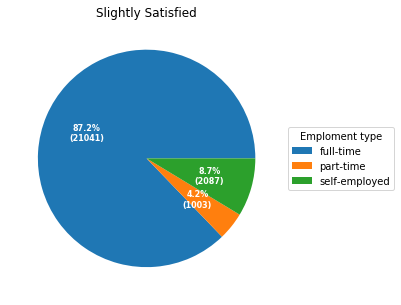

In [227]:
# Plots a pie chart with inserted data with a legend

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))  # Configures the 

df3 = ['21041 Employed full-time', '1003 Employed part-time', '2088 Independent contractor, freelancer, or self-employed'] # Saves data to be used in a list 

data = [float(x.split()[0]) for x in df3] # Slips the numerical data from the category in df3
employment_type = [x.split()[-1] for x in df3] # Slips the category data from the numerical in df3


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute) # Function to represent the data on the pie chart


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w")) # Defines attributes of the pie chart

ax.legend(wedges, employment_type,
          title="Emploment type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)) # Sets up the legend for the pie chart

plt.setp(autotexts, size=8, weight="bold") # Sets up the attributes for the text in the pie chart

ax.set_title("Slightly Satisfied") # Title of the pie chart

plt.show() # Displays pie chart

In [215]:
prop_sat = jobsat.iloc[0] # Selects the first row of jobsat

prop_sat # Prints values for prop_sat

JobSat
Neither satisfied nor dissatisfied     7208
Slightly dissatisfied                  9389
Slightly satisfied                    21041
Very dissatisfied                      4171
Very satisfied                        19257
Name: Employed full-time, dtype: int64

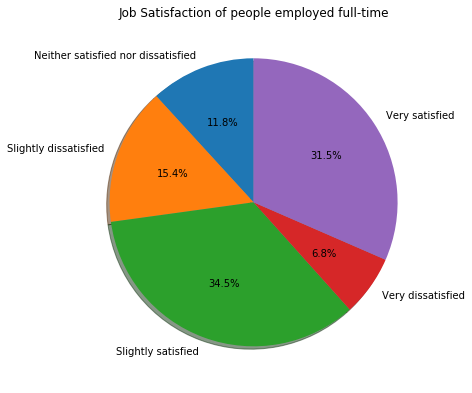

In [17]:
labels = 'Neither satisfied nor dissatisfied', 'Slightly dissatisfied', 'Slightly satisfied', 'Very dissatisfied', 'Very satisfied' # Stores the labels that will be used in the pie chart
sizes = prop_sat.values.tolist() # Inputs values that will be plotted

fig = plt.figure(figsize=(10,5)) # Configures the size of the pie chart
ax = fig.add_axes((0,0,.5,1)) # Atrributes of size of the pie chart
ax.set_title('Job Satisfaction of people employed full-time') # Title of pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) # Plots pie chart
plt.show() # Displays the pie chart

- **What correlates with career satisfaction in the tech industry:**
To get an idea of this, I used a correlation matrix which is labelled from 0 to 1 with any number closer to 1 showing an increased positive correlation and from -0 to -1 with any number closer to -1 showing an increasing negative corelation. Most times correlation matrices compare numerical data, so for this project, I check for the correlation between numerical data and there was no strong correlation positive or negative. I then used the Cramers V statistics matrix for comparing 2 categorical data to see how much the correlate.

- It showed that job satisfaction might positively correlate to career satisfaction. Although it's not a very strong correlation. In the real world this can be true depending on the job and career opportunities provided by each employer.

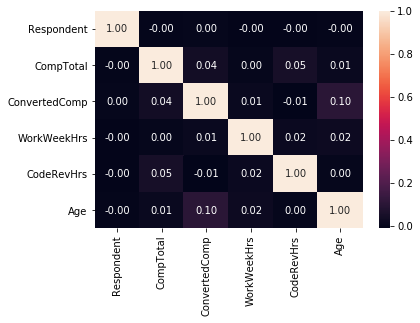

In [228]:
sns.heatmap(df.corr(), annot=True, fmt=".2f"); # Plots a correlation matrix

In [229]:
""" calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
        
        link:https://stackoverflow.com/questions/46498455/categorical-features-correlation
    """

def cramers(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(df["JobSat"], df["CareerSat"]).as_matrix() # Compute a simple cross tabulation of two (or more) factors
                                                                          # and converts the frame to its Numpy-array representation
cramers(confusion_matrix) # Prints the correlation coeficient of both variable

C:\Users\Tonye Harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.42691188005937986

This project doesn't include modelling/prediction as I would have liked to predict Total Compensation "CompTotal" with Work Hours per Week, Job Satisfaction and Code Review Hours but they don't correlate as much as I thought they would.

With the number of data points captured, my local machine wasn't able to process it effectively and crashed each time it was training and in future, I will have to use Google CoLab or other online services to work effectively.

## Conclusion

The tech industry is evolving daily and this will need you to upskill regularly to stay up to date but in general, you should have at least a university degree as many jobs require this. Job and career satisfaction is also an important part of choosing a career and depending on your employer, you will have to find ways to balance these things to achive your goals.

I invited you to use the data to create more insights and give me feedback on this project I have done.